In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('df_new_with_nan.csv')
df.head()

,district,doc,pre_date,cur_date,days,pre_read,cur_read,consumption,bill,obstcle,meter,Y,X,ID,flats,land_use,capacity,diameter
0,ناحيه 50 مراکز اداري دولتي,11292510,960418,970825,47,1564,16155,412,633996,NaN,1396/02/19,4.079694e+06,270177.868594,46620700,42,مسكوني,100,0.75
1,ناحيه 8 گرگان,11705225,980921,961014,97,10395,12159,371,568685,قرائت نشده,1395/06/20,NaN,NaN,43055800,17,مسكوني,70,0.75
2,ناحيه 5 گرگان,11147901,950426,980207,173,13502,13985,410,108353,از کار افتاده,1390/12/24,NaN,272725.693345,36070600,13,مسكوني,66,0.75
3,ناحيه 4 گرگان,11157787,941010,990214,152,7385,3188,433,1219749,قرائت نشده,1391/02/12,NaN,NaN,42761200,9,مسكوني,60,0.75
4,ناحيه 6 گرگان,41119865,981125,960226,82,12472,12692,486,136407,قرائت نشده,1397/11/25,NaN,271984.104536,12030900,42,مسكوني,17,0.75


In [3]:
df['district'] = pd.factorize(df['district'])[0]
df['district'] = df['district'].astype('category')

In [4]:
df['land_use'] = pd.factorize(df['land_use'])[0]
df['land_use'] = df['land_use'].astype('category')

In [5]:
df.head()

,district,doc,pre_date,cur_date,days,pre_read,cur_read,consumption,bill,obstcle,meter,Y,X,ID,flats,land_use,capacity,diameter
0,0,11292510,960418,970825,47,1564,16155,412,633996,NaN,1396/02/19,4.079694e+06,270177.868594,46620700,42,0,100,0.75
1,1,11705225,980921,961014,97,10395,12159,371,568685,قرائت نشده,1395/06/20,NaN,NaN,43055800,17,0,70,0.75
2,2,11147901,950426,980207,173,13502,13985,410,108353,از کار افتاده,1390/12/24,NaN,272725.693345,36070600,13,0,66,0.75
3,3,11157787,941010,990214,152,7385,3188,433,1219749,قرائت نشده,1391/02/12,NaN,NaN,42761200,9,0,60,0.75
4,4,41119865,981125,960226,82,12472,12692,486,136407,قرائت نشده,1397/11/25,NaN,271984.104536,12030900,42,0,17,0.75


In [6]:
df.meter = df.meter.str.replace('/','')
df.meter = df.meter.astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   district     10000 non-null  category
 1   doc          10000 non-null  int64   
 2   pre_date     10000 non-null  int64   
 3   cur_date     10000 non-null  int64   
 4   days         10000 non-null  int64   
 5   pre_read     10000 non-null  int64   
 6   cur_read     10000 non-null  int64   
 7   consumption  10000 non-null  int64   
 8   bill         10000 non-null  int64   
 9   obstcle      6647 non-null   object  
 10  meter        9994 non-null   category
 11  Y            4250 non-null   float64 
 12  X            4281 non-null   float64 
 13  ID           10000 non-null  int64   
 14  flats        10000 non-null  int64   
 15  land_use     10000 non-null  category
 16  capacity     10000 non-null  int64   
 17  diameter     10000 non-null  float64 
dtypes: category(3), float64(3),

In [8]:
df.head()

,district,doc,pre_date,cur_date,days,pre_read,cur_read,consumption,bill,obstcle,meter,Y,X,ID,flats,land_use,capacity,diameter
0,0,11292510,960418,970825,47,1564,16155,412,633996,NaN,13960219,4.079694e+06,270177.868594,46620700,42,0,100,0.75
1,1,11705225,980921,961014,97,10395,12159,371,568685,قرائت نشده,13950620,NaN,NaN,43055800,17,0,70,0.75
2,2,11147901,950426,980207,173,13502,13985,410,108353,از کار افتاده,13901224,NaN,272725.693345,36070600,13,0,66,0.75
3,3,11157787,941010,990214,152,7385,3188,433,1219749,قرائت نشده,13910212,NaN,NaN,42761200,9,0,60,0.75
4,4,41119865,981125,960226,82,12472,12692,486,136407,قرائت نشده,13971125,NaN,271984.104536,12030900,42,0,17,0.75


In [9]:
na_features = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in na_features:
    print(feature,'\t\t', np.round(df[feature].isnull().mean(),3), '%')

obstcle 		 0.335 %
meter 		 0.001 %
Y 		 0.575 %
X 		 0.572 %


In [17]:
df.isnull().sum()

district          0
doc               0
pre_date          0
cur_date          0
days              0
pre_read          0
cur_read          0
consumption       0
bill              0
obstcle        3353
meter             6
Y              5750
X              5719
ID                0
flats             0
land_use          0
capacity          0
diameter          0
dtype: int64

In [18]:
corr = df.corr()
corr.shape

C:\Users\azizi\AppData\Local\Temp\ipykernel_28100\542281113.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


(14, 14)

<Axes: >

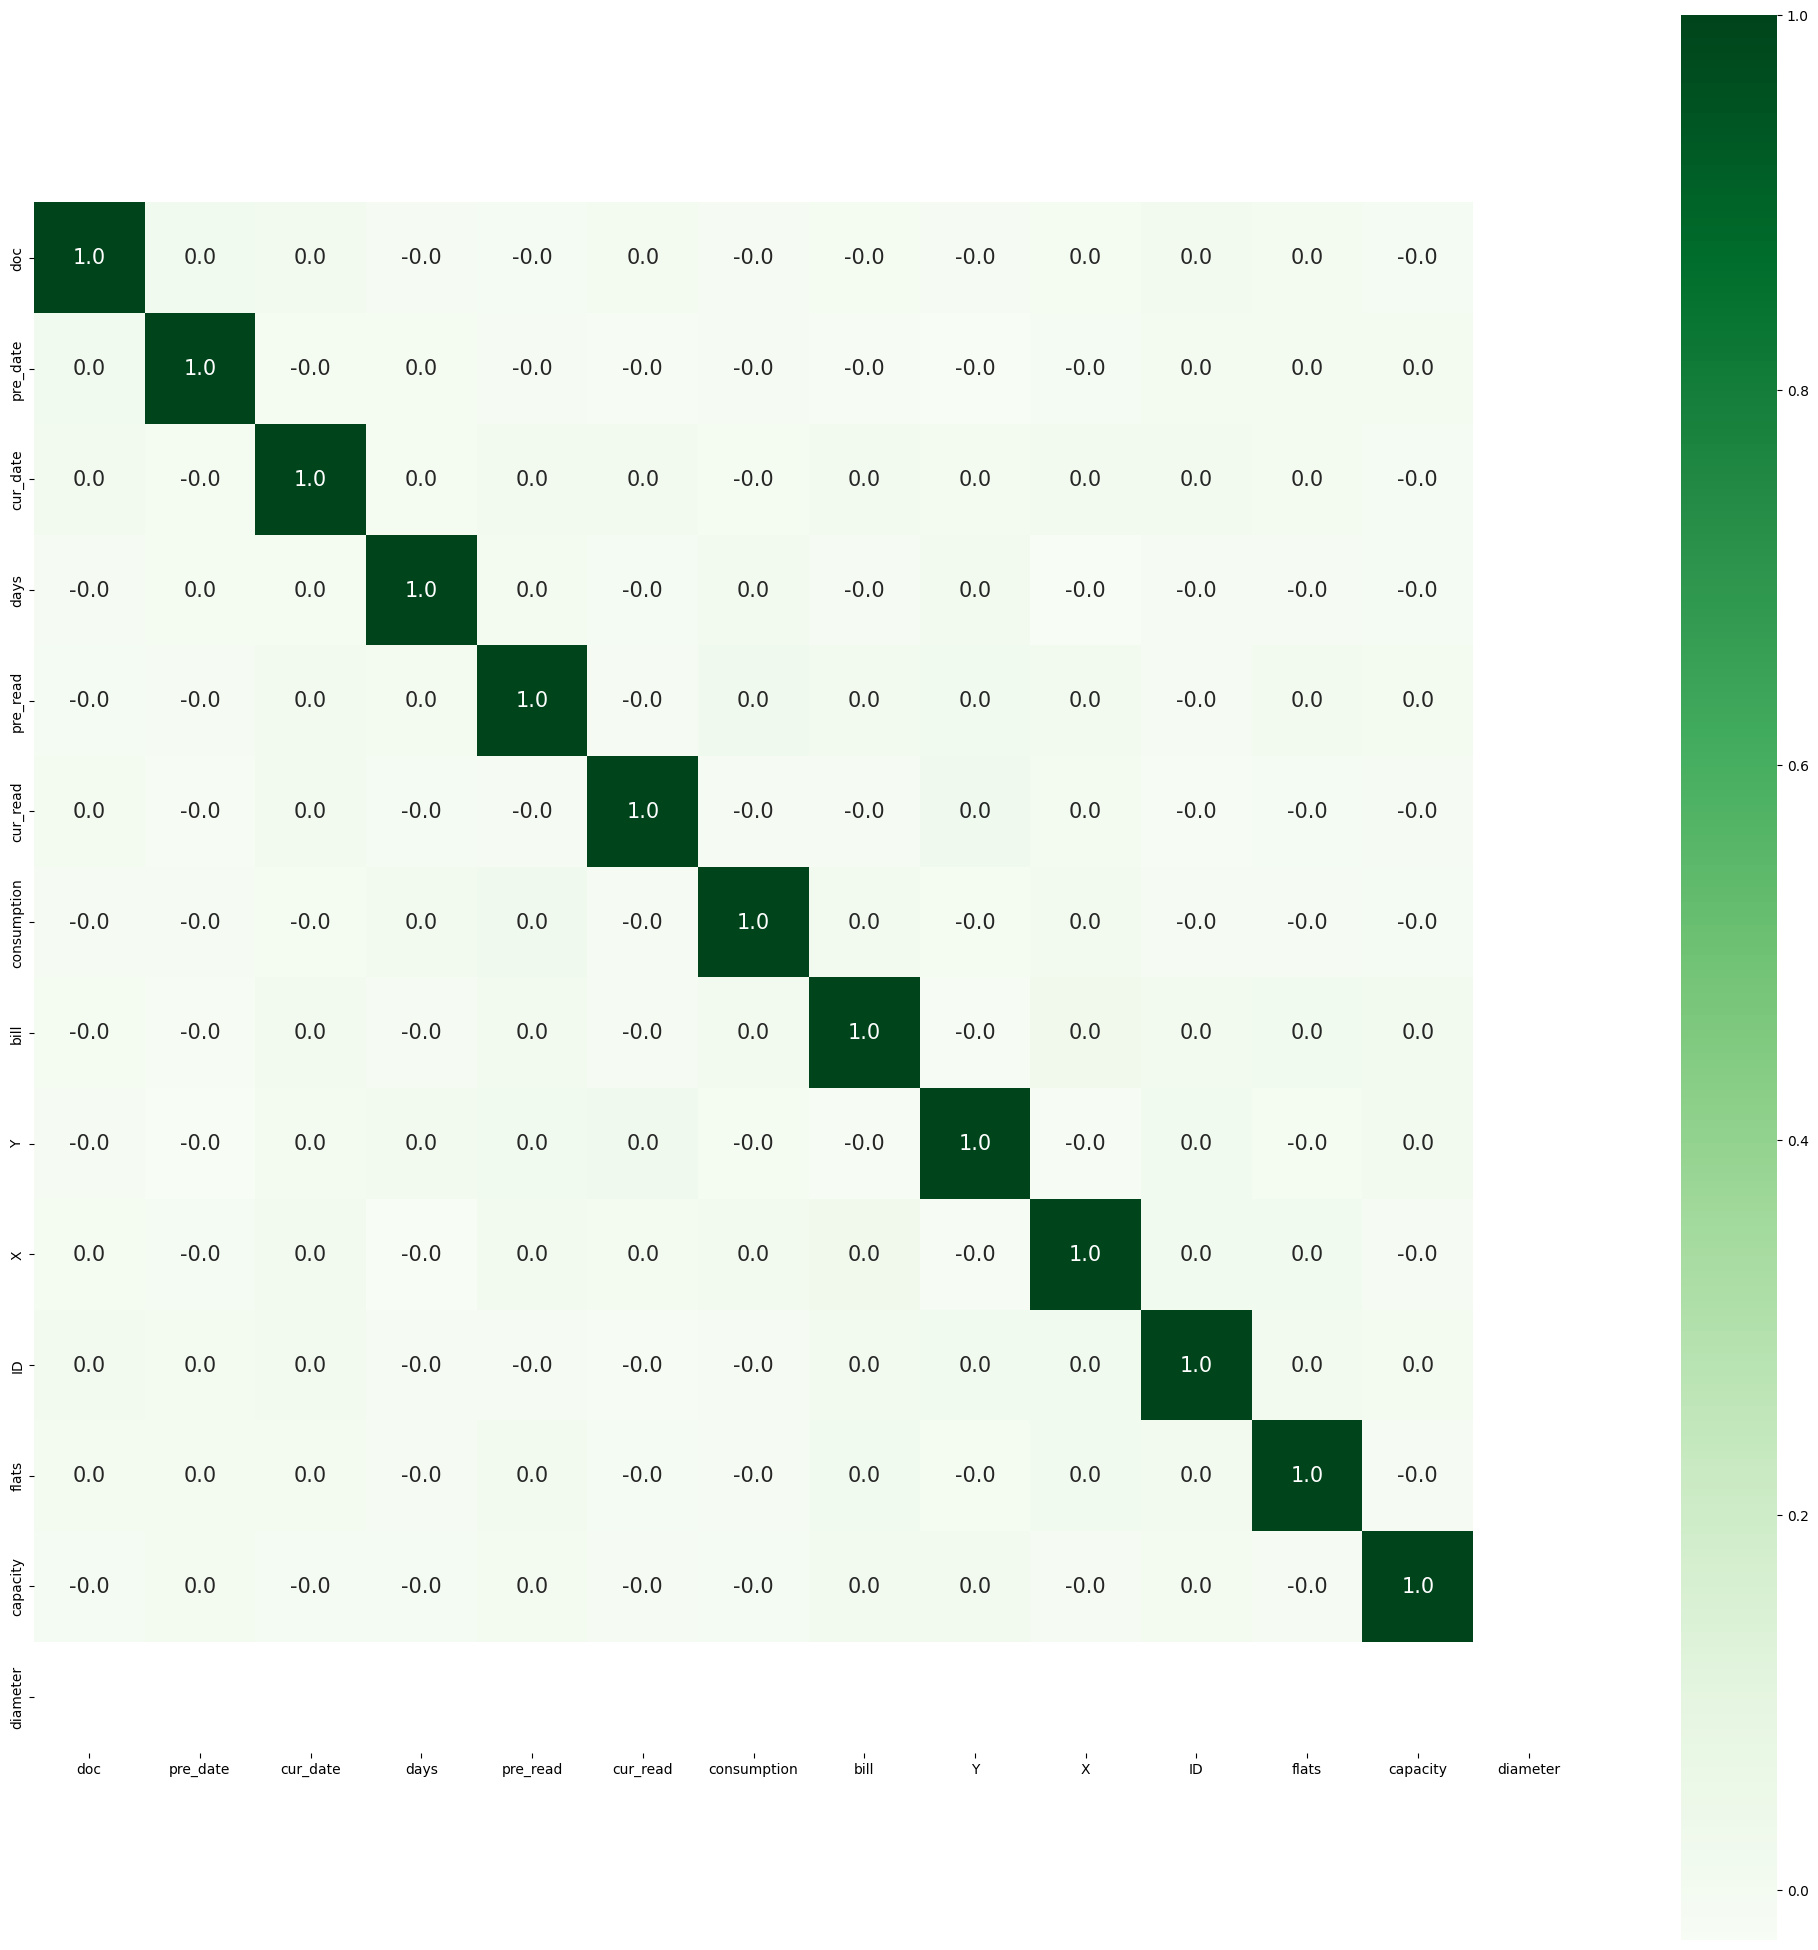

In [19]:
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

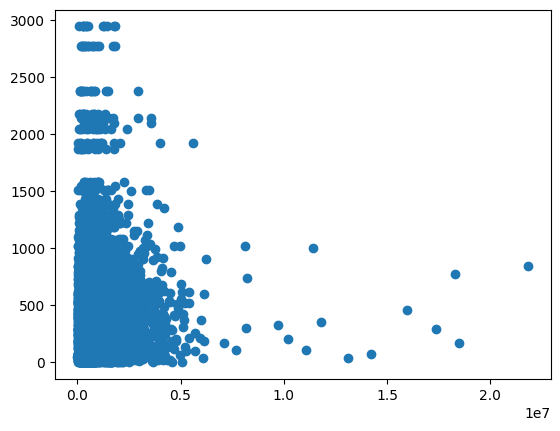

In [20]:
plt.scatter(df.bill, df.consumption)

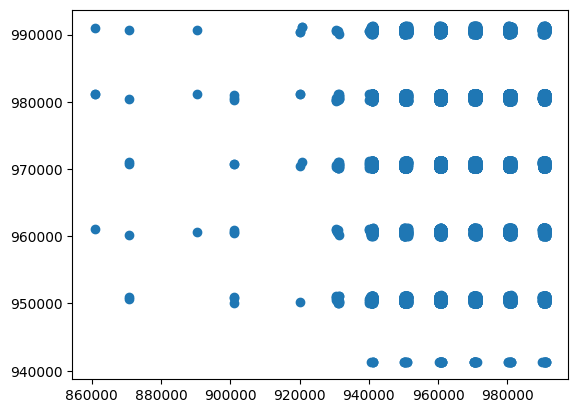

In [21]:
plt.scatter(df.pre_date, df.cur_date)

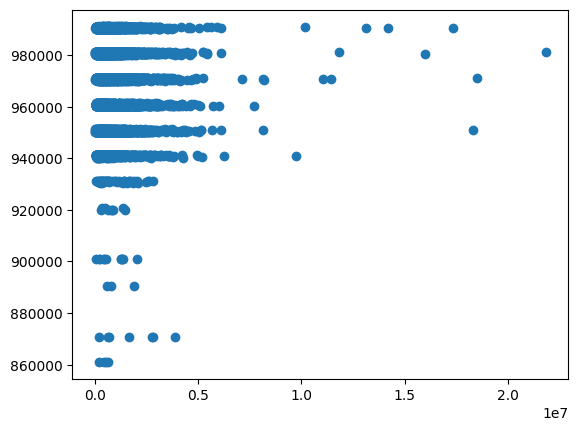

In [22]:
plt.scatter(df.bill, df.pre_date)

In [23]:
df.capacity.value_counts()

13     213
60     201
63     197
15     194
18     194
58     193
50     193
77     193
9      193
104    190
42     189
240    188
11     187
131    185
114    185
16     185
32     184
48     184
105    183
40     183
165    181
24     180
37     178
30     178
6      178
12     177
52     176
28     176
65     175
75     174
7      173
27     172
36     171
41     170
198    169
70     168
5      168
100    167
23     167
20     166
17     166
14     166
66     165
72     165
10     164
22     162
8      161
35     161
19     161
61     161
62     161
79     160
51     156
0      156
80     156
296    153
43     148
Name: capacity, dtype: int64

In [24]:
# temp_index = df[df['X'].isna()]
# temp_index      obstcle

temp_index = df[df['obstcle'].isna()]
temp_index  

,district,doc,pre_date,cur_date,days,pre_read,cur_read,consumption,bill,obstcle,meter,Y,X,ID,flats,land_use,capacity,diameter
0,0,11292510,960418,970825,47,1564,16155,412,633996,NaN,13960219,4.079694e+06,270177.868594,46620700,42,0,100,0.75
5,5,11308718,950618,980908,20,6135,19288,104,1612706,NaN,13970707,4.078123e+06,NaN,24030500,16,0,6,0.75
8,5,11631137,981121,960903,57,9652,5353,432,166535,NaN,13950705,4.077075e+06,270680.308017,22450500,20,0,13,0.75
10,7,11533363,981025,960230,230,8556,17773,624,1466075,NaN,13900308,NaN,NaN,21635400,23,0,35,0.75
11,5,41140023,960224,951026,125,5779,8912,650,1494762,NaN,13910830,4.080220e+06,272291.819571,27072500,12,0,114,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,15,11463519,941019,990827,6,2085,1983,840,581509,NaN,13971003,NaN,NaN,51701000,2,0,80,0.75
9987,15,11118731,990712,950231,8,5052,4652,679,912946,NaN,13970303,4.079410e+06,NaN,22630201,18,0,65,0.75
9990,6,11678166,980631,950601,153,16007,17173,64,155966,NaN,13971206,4.080213e+06,NaN,51500300,15,0,16,0.75
9994,4,11293800,951016,960513,213,1059,3509,35,348058,NaN,13960115,NaN,NaN,65176315,8,0,131,0.75


In [25]:
temp_index.index

Int64Index([   0,    5,    8,   10,   11,   12,   14,   15,   16,   17,
            ...
            9952, 9956, 9957, 9971, 9973, 9974, 9987, 9990, 9994, 9995],
           dtype='int64', length=3353)

In [26]:
# df_with_out_x_nan = df.drop(temp_index.index)
# df_with_out_x_nan   obstcle 		 0.335 %

df_with_out_obstcle_nan = df.drop(temp_index.index)
df_with_out_obstcle_nan 

,district,doc,pre_date,cur_date,days,pre_read,cur_read,consumption,bill,obstcle,meter,Y,X,ID,flats,land_use,capacity,diameter
1,1,11705225,980921,961014,97,10395,12159,371,568685,قرائت نشده,13950620,NaN,NaN,43055800,17,0,70,0.75
2,2,11147901,950426,980207,173,13502,13985,410,108353,از کار افتاده,13901224,NaN,272725.693345,36070600,13,0,66,0.75
3,3,11157787,941010,990214,152,7385,3188,433,1219749,قرائت نشده,13910212,NaN,NaN,42761200,9,0,60,0.75
4,4,41119865,981125,960226,82,12472,12692,486,136407,قرائت نشده,13971125,NaN,271984.104536,12030900,42,0,17,0.75
6,6,11113402,990307,980205,436,12183,12067,607,1056691,قرائت نشده,13950915,4.080191e+06,NaN,42240900,11,0,30,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,13,11315935,980510,990829,180,19689,2201,69,368729,از کار افتاده,13991210,NaN,267614.567461,65231200,4,0,104,0.75
9996,1,41174947,980211,950527,194,1943,2101,912,738857,از کار افتاده,13910207,4.081315e+06,NaN,26283200,5,0,35,0.75
9997,10,11378414,970509,991105,136,6656,13796,1094,667080,قرائت نشده,13980222,5.443627e+01,NaN,16450100,9,0,16,0.75
9998,15,11444425,950630,960225,69,2515,10194,484,375932,قرائت نشده,13940722,NaN,270826.247002,21413100,3,0,18,0.75


In [36]:
# x_train = df_with_out_x_nan[['district', 'doc', 'pre_date', 'cur_date', 'days', 'pre_read', 'cur_read'
#                 , 'consumption','bill', 'ID', 'flats', 'land_use', 'capacity', 'diameter']]
# y_x = df_with_out_x_nan['obstcle']      

x_train = df_with_out_obstcle_nan[['district', 'doc', 'pre_date', 'cur_date', 'days', 'pre_read', 'cur_read'
                , 'consumption','bill', 'ID', 'flats', 'land_use', 'capacity', 'diameter']]
y_x = df_with_out_obstcle_nan['obstcle']      

In [37]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x_train, y_x)



In [38]:
corr = pd.DataFrame(x).corr()
corr.shape

(14, 14)

<Axes: >

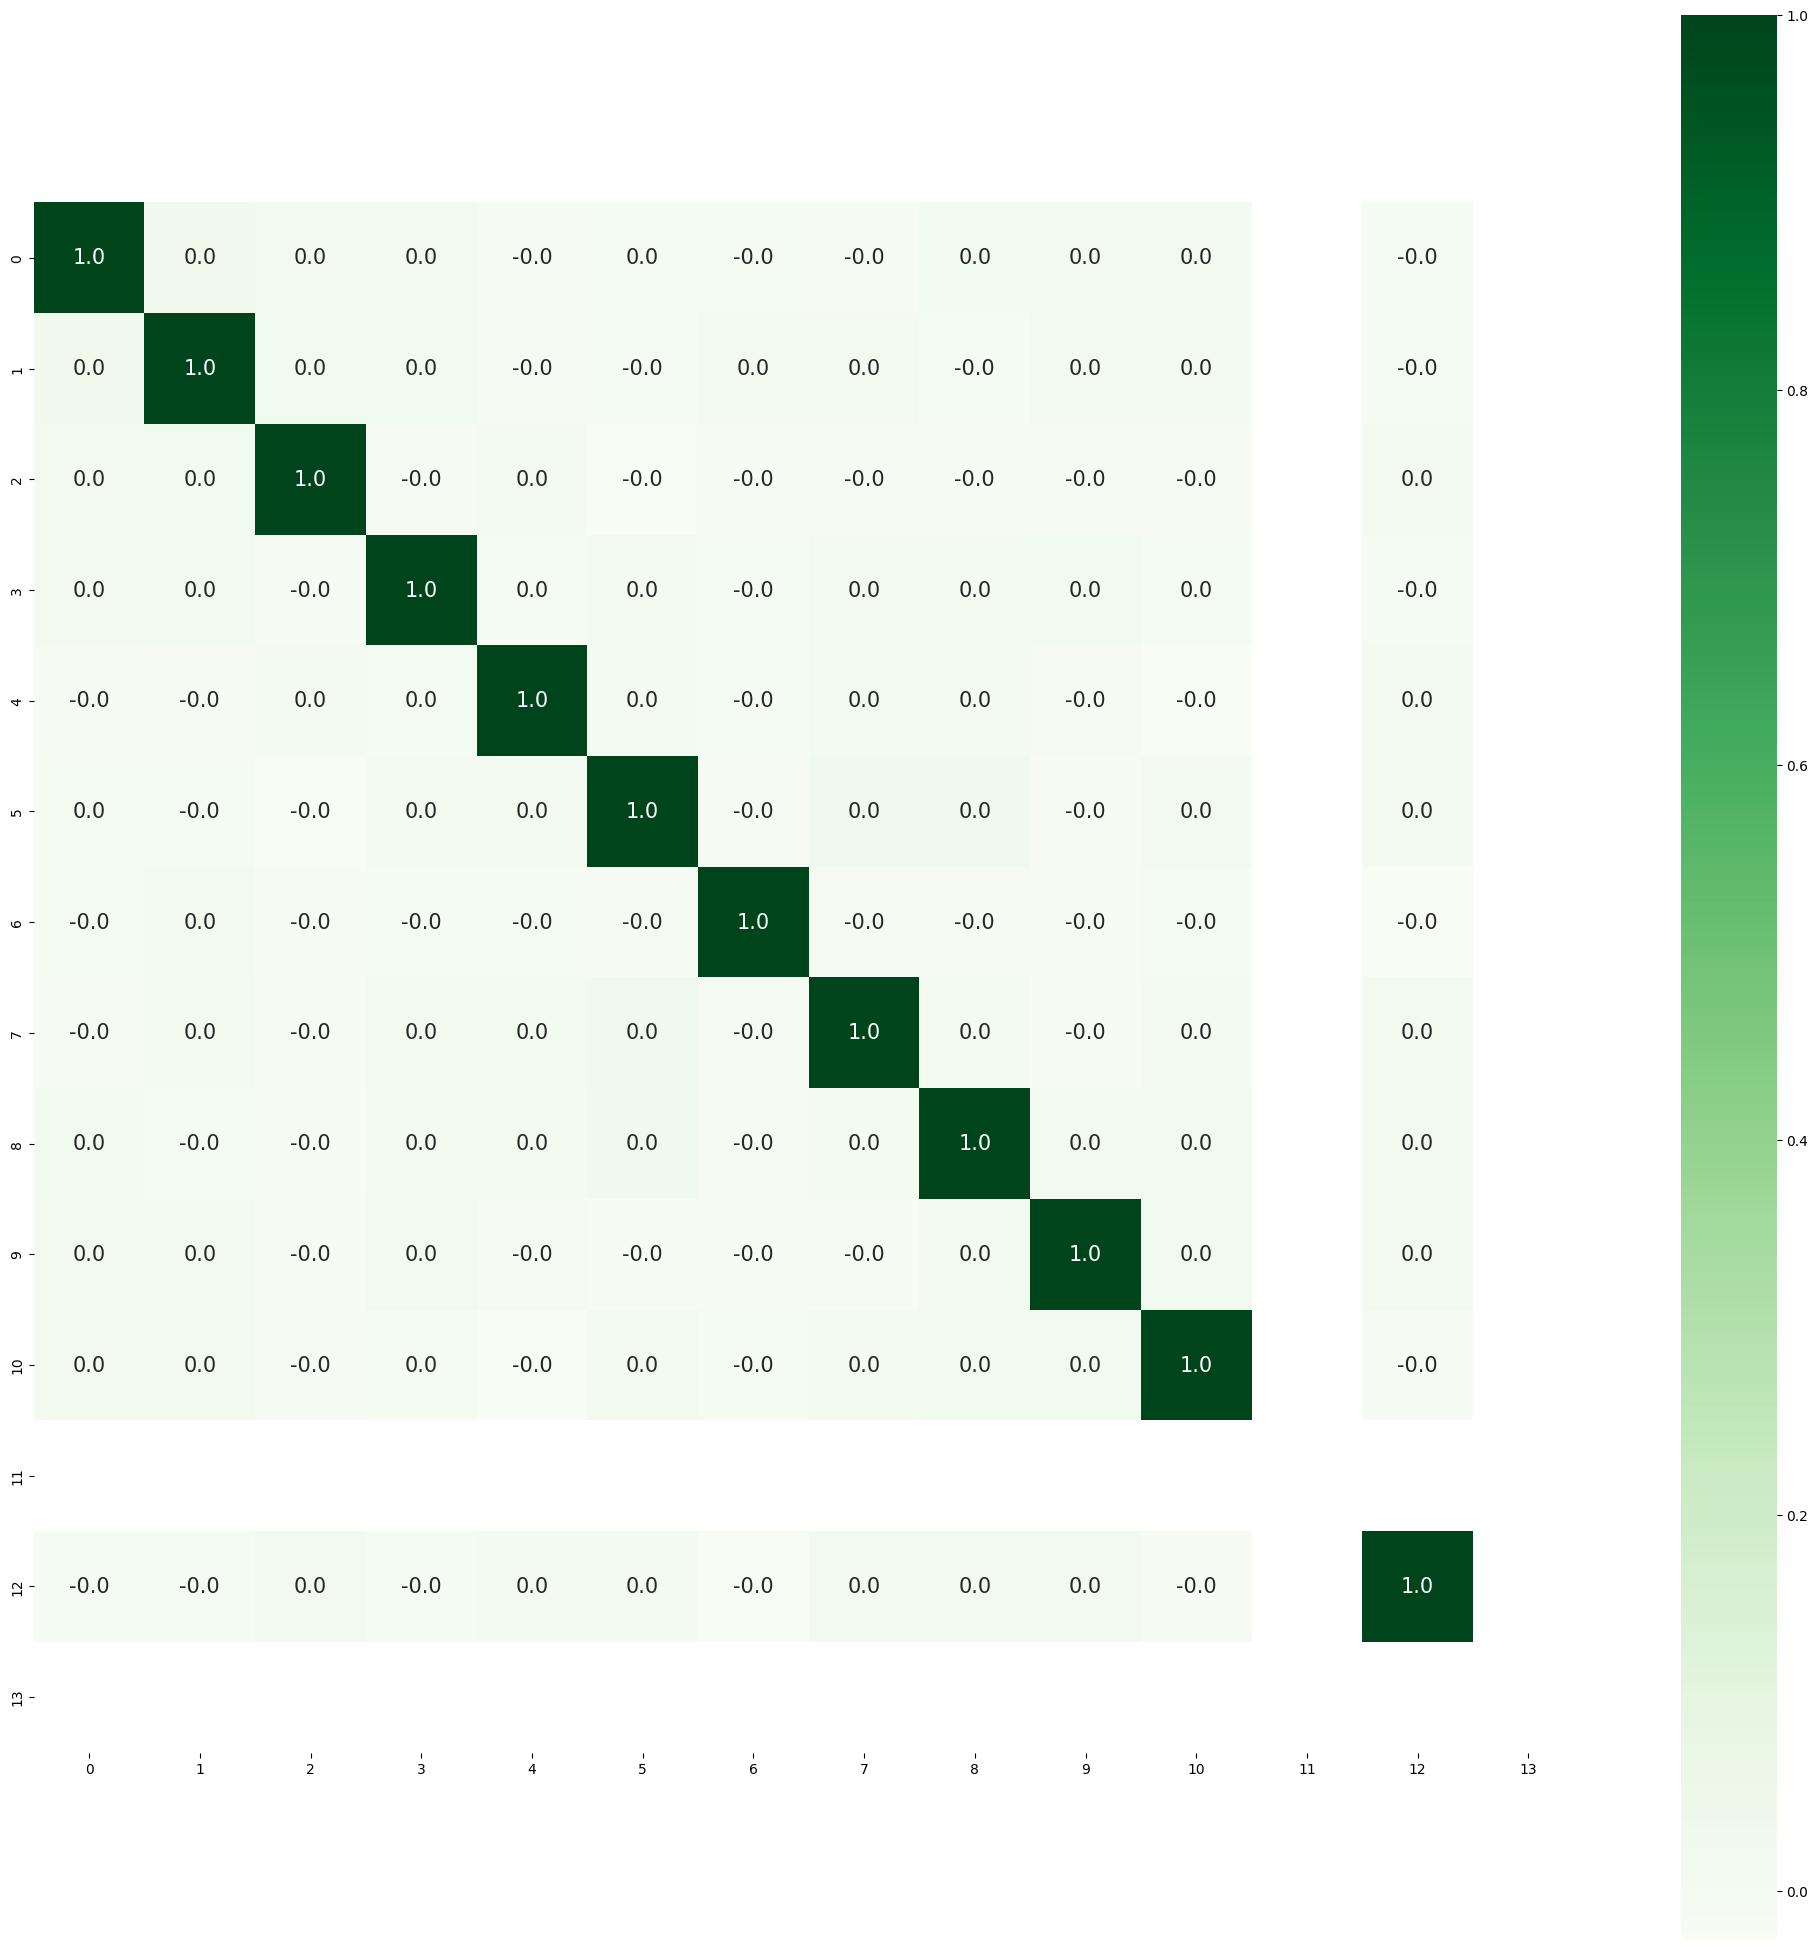

In [39]:
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [46]:
x[:5]

array([[-1.42098511, -0.47458313,  0.83959855, -0.7319137 , -0.44723567,
         0.24323143,  0.50101047, -0.15636447, -0.3490743 ,  0.71689445,
         0.36117451,  0.        ,  0.24620378,  0.        ],
       [-1.20283402, -0.51340269, -1.05238424,  0.61677211, -0.21055195,
         0.72529695,  0.78117221, -0.04323223, -0.85257894,  0.29839831,
        -0.06691518,  0.        ,  0.17518289,  0.        ],
       [-0.98468292, -0.5127141 , -1.63657542,  1.31996071, -0.2759514 ,
        -0.22378409, -0.87540297,  0.02348679,  0.36305031,  0.69924442,
        -0.49500486,  0.        ,  0.06865156,  0.        ],
       [-0.76653182,  1.57424926,  0.8522552 , -0.7872862 , -0.49394956,
         0.56548766,  0.58278824,  0.17723061, -0.82189387, -1.14186418,
         3.03673505,  0.        , -0.69482296,  0.        ],
       [-0.33022963, -0.51580567,  1.42192846,  0.61663157,  0.60849827,
         0.52064796,  0.48689498,  0.52823065,  0.18469977,  0.6680723 ,
        -0.28096002,  0.  

In [29]:
x_train.isnull().sum()

district       0
doc            0
pre_date       0
cur_date       0
days           0
pre_read       0
cur_read       0
consumption    0
bill           0
ID             0
flats          0
land_use       0
capacity       0
diameter       0
dtype: int64

In [47]:
x.shape

(6647, 14)

In [52]:
y_x = y_x.replace({'قرائت نشده': 1, 'از کار افتاده': 0 })
y_x[:5]


1    1
2    0
3    1
4    1
6    1
Name: obstcle, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_x, random_state=0, train_size=0.7)

In [54]:
print('size of x train : ', x_train.shape, '  size of y train : ', y_train.shape)
print('size of x test : ', x_test.shape, '  size of y test : ', y_test.shape)

size of x train :  (4652, 14)   size of y train :  (4652,)
size of x test :  (1995, 14)   size of y test :  (1995,)


In [55]:
from sklearn.linear_model import LogisticRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [56]:
y_hat_train = lr_model.predict(x_train)

In [58]:
from sklearn.metrics import accuracy_score

temp_predict_1 = lr_model.predict(x_train)
print('accuray of train : ', accuracy_score(y_train, temp_predict_1))

temp_predict_2 = lr_model.predict(x_test)
print('accuray of test : ', accuracy_score(y_test, temp_predict_2))


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [33]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

print("Residual sum of squares: %.2f"
      % np.mean((y_hat_train - y_train) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr_model.score(x_train, y_train))
print(f'r2 score is : {r2_score(y_train, y_hat_train)}')

Residual sum of squares: 1546050314.73
Variance score: 0.00
r2 score is : 0.0036954930442381073


In [34]:
y_hat_test = lr_model.predict(x_test)

print("Residual sum of squares: %.2f"
      % np.mean((y_hat_test - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr_model.score(x_test, y_test))
print(f'r2 score is : {r2_score(y_test, y_hat_test)}')

Residual sum of squares: 1755596524.00
Variance score: -0.00
r2 score is : -0.004719098681509104


In [36]:
(y_hat_test == y_test).value_counts()

False    1285
Name: X, dtype: int64